In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras import Sequential
from keras import layers
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.optimizers import adam_v2
from tensorflow.keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import random
from tqdm.notebook import tqdm
import collections
from keras.models import load_model

In [2]:
import module

In [3]:
import importlib
importlib.reload(module)

<module 'module' from 'C:\\Users\\Admin\\Documents\\Anaconda1\\08_random_aug_edge\\module.py'>

In [4]:
train_data = np.array(pd.read_pickle('D:/F/df/NoDef/X_train_NoDef.pkl')) # shape (76000, 5000), 95 website, 800 repeat
train_index = np.array(pd.read_pickle('D:/F/df/NoDef/y_train_NoDef.pkl')) # shape (76000,), 0-94 range, random

test_data = np.array(pd.read_pickle('D:/F/df/NoDef/X_test_NoDef.pkl')) # shape (9500, 5000), 95 website, 100 repeat
test_index = np.array(pd.read_pickle('D:/F/df/NoDef/y_test_NoDef.pkl')) # shape (9500,), 0-94 range, sequence

In [5]:
test_data_ow = np.array(pd.read_pickle('D:/F/df_ow/X_test_Unmon_NoDef.pkl')) #shape (20000, 5000)

In [6]:
model = load_model('data/model_tor.h5')

In [7]:
model.evaluate(test_data.astype('float32'), to_categorical(test_index))

297/297 [==============================] - 21s 67ms/step - loss: 0.3002 - accuracy: 0.9336


[0.3002021610736847, 0.9335789680480957]

In [8]:
# WF 无操作

In [9]:
TPR, FPR = module.ow_evaluate_tor(model, test_data, test_data_ow)

625/625 [==============================] - 38s 61ms/step


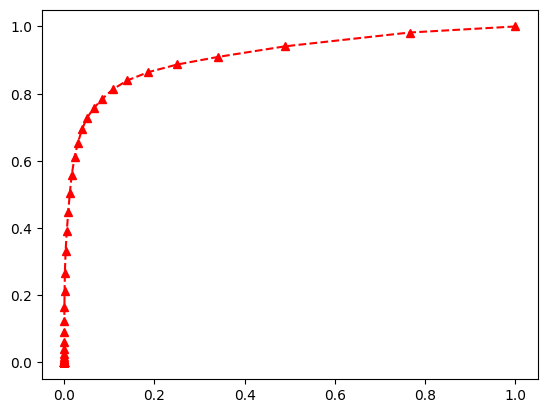

In [10]:
plt.plot(FPR, TPR, 'r^--')

In [11]:
FPR_WF = FPR.copy()
TPR_WF = TPR.copy()

In [12]:
# RCD Insert

In [13]:
def get_data_length(data_vector):
    data_length = 5000
    for i in range(5000):
        if data_vector[i] == 0:
            data_length = i
            break
    return data_length

def add_noise(data_vector, data_length, count):
    for i in range(count):
        location = random.randint(0, data_length - 1)
        packet = random.randint(0, 1) * 2 - 1
        data_vector = np.insert(data_vector, location, packet)
        if data_length < 5000:
            data_length += 1
    
    return data_vector[0 : 5000]

In [14]:
rate = 0.2
test_data_noise = test_data.copy()
for i in range(9500):
    length = get_data_length(test_data_noise[i])
    test_data_noise[i] = add_noise(test_data_noise[i], length, int(length * rate))

rate = 0.2
test_data_ow_noise = test_data_ow.copy()
for i in range(9500):
    length = get_data_length(test_data_ow_noise[i])
    test_data_ow_noise[i] = add_noise(test_data_ow_noise[i], length, int(length * rate))

In [15]:
TPR, FPR = module.ow_evaluate_tor(model, test_data_noise, test_data_ow_noise)

625/625 [==============================] - 41s 66ms/step


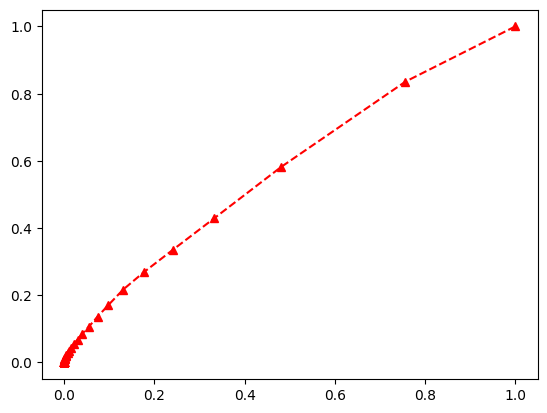

In [16]:
plt.plot(FPR, TPR, 'r^--')

In [17]:
FPR_Insert = FPR.copy()
TPR_Insert = TPR.copy()

In [18]:
# RCD Insert AA

In [19]:
model_aa = load_model('data/model_tor_random_aug.h5')
TPR, FPR = module.ow_evaluate_tor(model_aa, test_data_noise, test_data_ow_noise)

625/625 [==============================] - 41s 66ms/step


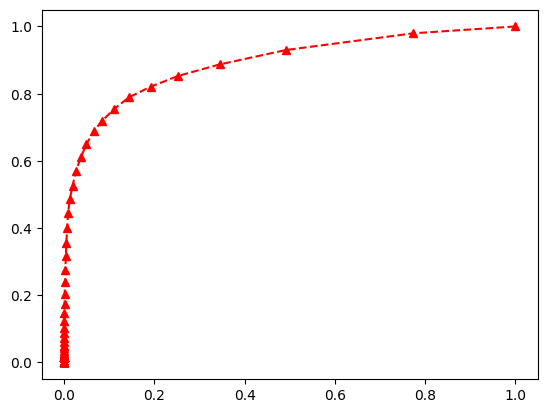

In [20]:
plt.plot(FPR, TPR, 'r^--')

In [21]:
FPR_Insert_AA = FPR.copy()
TPR_Insert_AA = TPR.copy()

In [22]:
# WalkieTalkie

In [23]:
def get_data_length(data_vector):
    data_length = 5000
    for i in range(5000):
        if data_vector[i] == 0:
            data_length = i
            break
    return data_length

def walkie_talkie(data_vector, buffer_len):
    buffer = list()
    data_output = np.zeros(5000, dtype=int)
    index = 0
    for i in data_vector:
        buffer.append(i)
        if len(buffer) >= buffer_len:
            stat = collections.Counter(buffer)
            for j in range(stat[1]):
                data_output[index] = 1
                index += 1
            for j in range(stat[-1]):
                data_output[index] = -1
                index += 1
            buffer.clear()
            if stat[0] > 0:
                break
    return data_output

def add_noise(data_vector, data_length, count):
    for i in range(count):
        location = random.randint(0, data_length - 1)
        packet = data_vector[location]
        data_vector = np.insert(data_vector, location, packet)
        if data_length < 5000:
            data_length += 1
    
    return data_vector[0 : 5000]

In [24]:
rate = 0.2
test_data_noise = test_data.copy()
for i in range(9500):
    length = get_data_length(test_data_noise[i])
    test_data_noise[i] = walkie_talkie(test_data_noise[i], 20)
    test_data_noise[i] = add_noise(test_data_noise[i], length, int(length * rate))

rate = 0.2
test_data_ow_noise = test_data_ow.copy()
for i in range(9500):
    length = get_data_length(test_data_ow_noise[i])
    test_data_noise[i] = walkie_talkie(test_data_noise[i], 20)
    test_data_noise[i] = add_noise(test_data_noise[i], length, int(length * rate))

In [25]:
TPR, FPR = module.ow_evaluate_tor(model, test_data_noise, test_data_ow_noise)

625/625 [==============================] - 39s 62ms/step


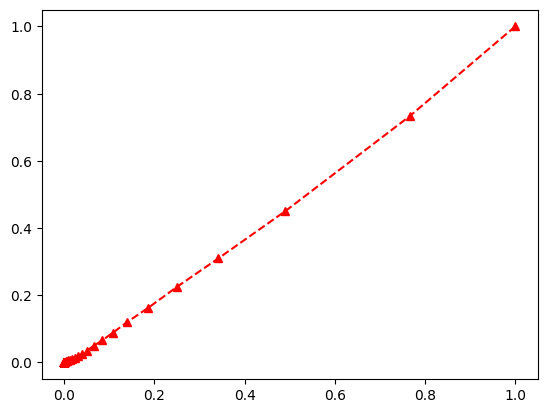

In [26]:
plt.plot(FPR, TPR, 'r^--')

In [27]:
FPR_WalkieTalkie = FPR.copy()
TPR_WalkieTalkie = TPR.copy()

In [28]:
# RPD WalkieTalkie AA

In [29]:
model_aa = load_model('data/model_tor_walkietalkie_aug.h5')
TPR, FPR = module.ow_evaluate_tor(model_aa, test_data_noise, test_data_ow_noise)

625/625 [==============================] - 42s 67ms/step


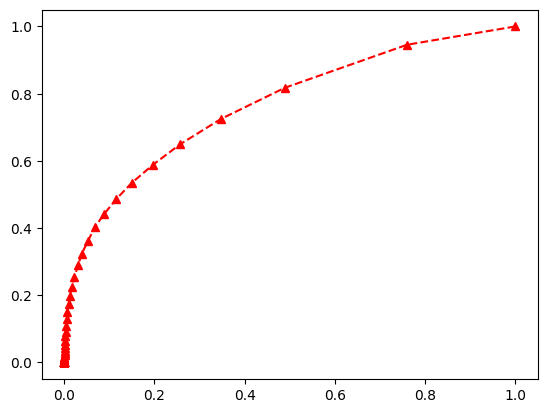

In [30]:
plt.plot(FPR, TPR, 'r^--')

In [31]:
FPR_WalkieTalkie_AA = FPR.copy()
TPR_WalkieTalkie_AA = TPR.copy()

In [32]:
# WTFPAD

In [33]:
def get_data_length(data_vector):
    data_length = 5000
    for i in range(5000):
        if data_vector[i] == 0:
            data_length = i
            break
    return data_length

def wtf_pad(data_vector, data_length, count):
    burst_location = list()
    for i in range(10):
        burst_location.append(random.randint(0, data_length-1))
        
    for i in range(count):
        location = burst_location[random.randint(0, 10-1)] + random.randint(-10, 10)
        if location < 0:
            location = 0
        elif location > 5000:
            location = 5000
        packet = random.randint(0, 1) * 2 - 1
        data_vector = np.insert(data_vector, location, packet)
    return data_vector[0 : 5000]

def add_noise(data_vector, data_length, count):
    for i in range(count):
        location = random.randint(0, data_length - 1)
        packet = random.randint(0, 1) * 2 - 1
        data_vector = np.insert(data_vector, location, packet)
        if data_length < 5000:
            data_length += 1
    
    return data_vector[0 : 5000]

In [34]:
rate = 0.2
test_data_noise = test_data.copy()
for i in range(9500):
    length = get_data_length(test_data_noise[i])
    test_data_noise[i] = wtf_pad(test_data_noise[i], length, int(length * rate / 2))
    test_data_noise[i] = add_noise(test_data_noise[i], length, int(length * rate / 2))

rate = 0.2
test_data_ow_noise = test_data_ow.copy()
for i in range(9500):
    length = get_data_length(test_data_noise[i])
    test_data_noise[i] = wtf_pad(test_data_noise[i], length, int(length * rate / 2))
    test_data_noise[i] = add_noise(test_data_noise[i], length, int(length * rate / 2))

In [35]:
TPR, FPR = module.ow_evaluate_tor(model, test_data_noise, test_data_ow_noise)

625/625 [==============================] - 41s 66ms/step


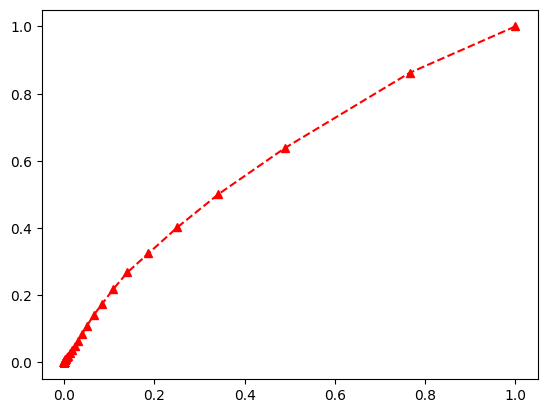

In [36]:
plt.plot(FPR, TPR, 'r^--')

In [37]:
FPR_WTFPAD = FPR.copy()
TPR_WTFPAD = TPR.copy()

In [38]:
# RPD WTFPAD AA

In [39]:
model_aa = load_model('data/model_tor_wtfpad_aug.h5')
TPR, FPR = module.ow_evaluate_tor(model_aa, test_data_noise, test_data_ow_noise)

625/625 [==============================] - 41s 65ms/step


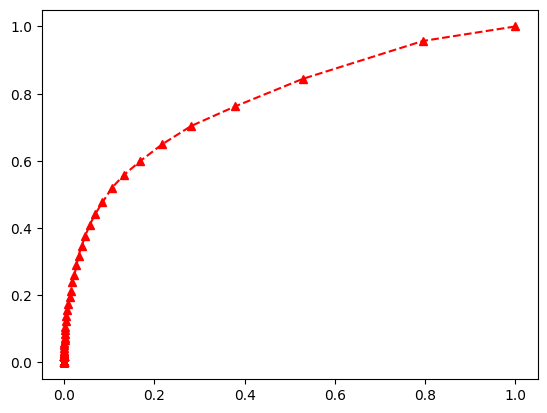

In [40]:
plt.plot(FPR, TPR, 'r^--')

In [41]:
FPR_WTFPAD_AA = FPR.copy()
TPR_WTFPAD_AA = TPR.copy()

In [42]:
np.save('data/roc_tor_aa/FPR_WF.npy', FPR_WF)
np.save('data/roc_tor_aa/TPR_WF.npy', TPR_WF)

np.save('data/roc_tor_aa/FPR_Insert.npy', FPR_Insert)
np.save('data/roc_tor_aa/TPR_Insert.npy', TPR_Insert)
np.save('data/roc_tor_aa/FPR_Insert_AA.npy', FPR_Insert_AA)
np.save('data/roc_tor_aa/TPR_Insert_AA.npy', TPR_Insert_AA)

np.save('data/roc_tor_aa/FPR_WalkieTalkie.npy', FPR_WalkieTalkie)
np.save('data/roc_tor_aa/TPR_WalkieTalkie.npy', TPR_WalkieTalkie)
np.save('data/roc_tor_aa/FPR_WalkieTalkie_AA.npy', FPR_WalkieTalkie_AA)
np.save('data/roc_tor_aa/TPR_WalkieTalkie_AA.npy', TPR_WalkieTalkie_AA)

np.save('data/roc_tor_aa/FPR_WTFPAD.npy', FPR_WTFPAD)
np.save('data/roc_tor_aa/TPR_WTFPAD.npy', TPR_WTFPAD)
np.save('data/roc_tor_aa/FPR_WTFPAD_AA.npy', FPR_WTFPAD_AA)
np.save('data/roc_tor_aa/TPR_WTFPAD_AA.npy', TPR_WTFPAD_AA)

In [43]:
FPR_WF = np.load('data/roc_tor_aa/FPR_WF.npy')
TPR_WF = np.load('data/roc_tor_aa/TPR_WF.npy')

FPR_Insert = np.load('data/roc_tor_aa/FPR_Insert.npy')
TPR_Insert = np.load('data/roc_tor_aa/TPR_Insert.npy')
FPR_Insert_AA = np.load('data/roc_tor_aa/FPR_Insert_AA.npy')
TPR_Insert_AA = np.load('data/roc_tor_aa/TPR_Insert_AA.npy')

FPR_WalkieTalkie = np.load('data/roc_tor_aa/FPR_WalkieTalkie.npy')
TPR_WalkieTalkie = np.load('data/roc_tor_aa/TPR_WalkieTalkie.npy')
FPR_WalkieTalkie_AA = np.load('data/roc_tor_aa/FPR_WalkieTalkie_AA.npy')
TPR_WalkieTalkie_AA = np.load('data/roc_tor_aa/TPR_WalkieTalkie_AA.npy')

FPR_WTFPAD = np.load('data/roc_tor_aa/FPR_WTFPAD.npy')
TPR_WTFPAD = np.load('data/roc_tor_aa/TPR_WTFPAD.npy')
FPR_WTFPAD_AA = np.load('data/roc_tor_aa/FPR_WTFPAD_AA.npy')
TPR_WTFPAD_AA = np.load('data/roc_tor_aa/TPR_WTFPAD_AA.npy')

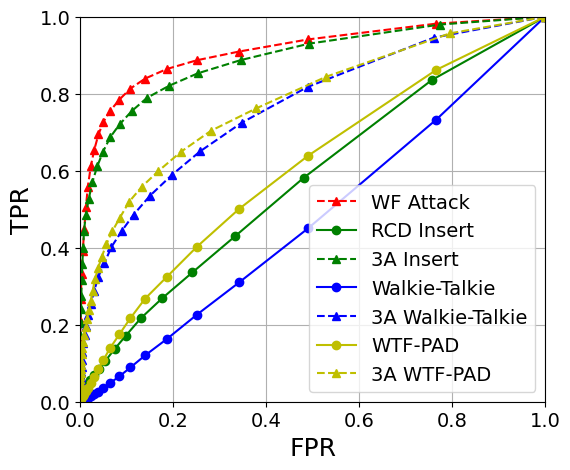

In [46]:
plt.figure(figsize=(6,5))

plt.plot(FPR_WF, TPR_WF, 'r^--')

plt.plot(FPR_Insert, TPR_Insert, 'go-')
plt.plot(FPR_Insert_AA, TPR_Insert_AA, 'g^--')

plt.plot(FPR_WalkieTalkie, TPR_WalkieTalkie, 'bo-')
plt.plot(FPR_WalkieTalkie_AA, TPR_WalkieTalkie_AA, 'b^--')

plt.plot(FPR_WTFPAD, TPR_WTFPAD, 'yo-')
plt.plot(FPR_WTFPAD_AA, TPR_WTFPAD_AA, 'y^--')


plt.legend(['WF Attack', 'RCD Insert', '3A Insert', 'Walkie-Talkie', '3A Walkie-Talkie', 'WTF-PAD', '3A WTF-PAD'], fontsize=14)
plt.xlim((0,1))
plt.ylim((0,1))
plt.xlabel('FPR', fontsize=18)
plt.ylabel('TPR', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.savefig('C:/Users/Admin/Desktop/roc_tor_aa.pdf', bbox_inches = 'tight')